# <center>Simple WhatsApp Conversation Analysis </center>


In [58]:
import regex
import pandas as pd
import numpy as np
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [60]:
import pandas as pd
import re

def read_conversation(filename):
    conversation = []
    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()
            match = re.match(r'\[(.*?)\] (.*?): (.*)', line)
            if match:
                timestamp = match.group(1)
                date, time = timestamp.split(', ')
                sender = match.group(2)
                message = match.group(3)
                conversation.append({'Date': date, 'Time': time, 'Sender': sender, 'Message': message})
    return pd.DataFrame(conversation)


filename = 'Sa.txt' 
df = read_conversation(filename)
df

,Date,Time,Sender,Message
0,4/4/22,1:14:12 pm,Sasha,‎Messages and calls are end-to-end encrypted. ...
1,4/4/22,1:14:12 pm,Sasha,s3912063@student.rmit.edu.au
2,22/4/22,12:23:07 am,RA,Sasha
3,22/4/22,7:05:15 am,Sasha,Hii
4,22/4/22,7:05:43 am,Sasha,Tell me
...,...,...,...,...
308,4/1/23,2:13:48 pm,Sasha,hey did you do cloud computing
309,4/1/23,2:14:10 pm,RA,Lol nop
310,4/1/23,2:14:36 pm,Sasha,ahaaa
311,4/1/23,2:14:37 pm,Sasha,okeyy


In [61]:
Total_msg = df.shape[0]
Total_msg

313

In [62]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

0


In [63]:
import pandas as pd
import re

def extract_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    emojis = re.findall(emoji_pattern, text)
    return emojis


df['Emojis'] = df['Message'].apply(extract_emojis)
total_emojis = sum(df['Emojis'].str.len())

print(f"Total Emojis: {total_emojis}")

Total Emojis: 26


/var/folders/td/3vjbvcbn15zgchwd7z6g2vsm0000gn/T/ipykernel_3513/532481923.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
/var/folders/td/3vjbvcbn15zgchwd7z6g2vsm0000gn/T/ipykernel_3513/532481923.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(message_count['Date'].dt.strftime('%d-%b-%y')))


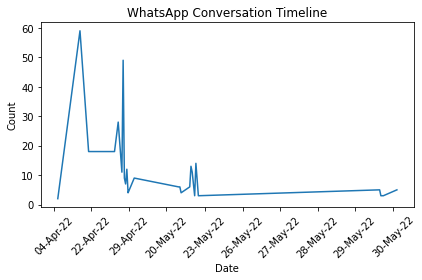

In [64]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
# Count the number of messages per date
message_count = df.groupby('Date').size().reset_index(name='Count')

# Create a line chart
plt.plot(message_count['Date'], message_count['Count'])

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('WhatsApp Conversation Timeline')

# Format x-axis tick labels as date
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(message_count['Date'].dt.strftime('%d-%b-%y')))

# Display the chart
plt.tight_layout()
plt.show()

/var/folders/td/3vjbvcbn15zgchwd7z6g2vsm0000gn/T/ipykernel_3513/2369025640.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
/var/folders/td/3vjbvcbn15zgchwd7z6g2vsm0000gn/T/ipykernel_3513/2369025640.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df['Time'].dt.strftime('%H:%M:%S %p')))


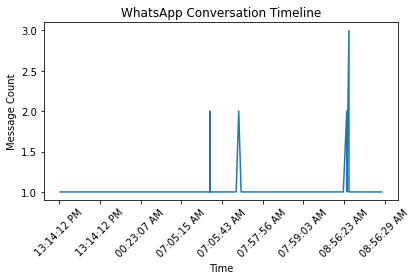

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have a DataFrame named df with 'Time' column in datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Group by 'Time' and count the number of messages
message_count = df.groupby('Time').size().reset_index(name='Count')

# Create a line chart
plt.plot(message_count['Time'], message_count['Count'])

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Message Count')
plt.title('WhatsApp Conversation Timeline')

# Format x-axis tick labels as time
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df['Time'].dt.strftime('%H:%M:%S %p')))

# Display the chart
plt.tight_layout()
plt.show()


## The most frequent words: 

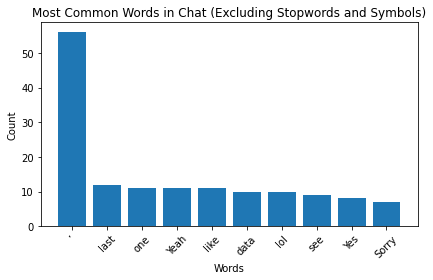

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Assuming you have a DataFrame named df with a 'Message' column

# Concatenate all the messages into a single string
all_messages = ' '.join(df['Message'])

# Tokenize the string into individual words
tokens = word_tokenize(all_messages)

# Remove stopwords and symbols
stop_words = set(stopwords.words('english'))
symbols = set(string.punctuation)
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in symbols]

# Count the occurrences of each word
word_counts = Counter(filtered_tokens)

# Get the most common words and their counts
most_common_words = word_counts.most_common(10)  # Change the number to get more or fewer common words

# Extract the words and counts for plotting
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Create a bar chart
plt.bar(words, counts)

# Set labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Most Common Words in Chat (Excluding Stopwords and Symbols)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()
plt.show()


## Who Participants the most 

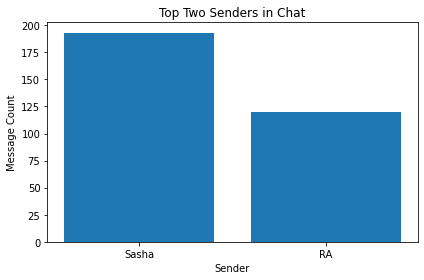

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Sender' column

# Count the number of messages sent by each sender
sender_counts = df['Sender'].value_counts()

# Get the top two senders who talked the most
top_senders = sender_counts.head(2)

# Create a bar chart
plt.bar(top_senders.index, top_senders.values)

# Set labels and title
plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.title('Top Two Senders in Chat')

# Display the chart
plt.tight_layout()
plt.show()

## Who is the funner: 
To determine who was the funnier person in the conversation, we can analyze the content of the messages and identify the sender with the most humorous or funny messages. One way to approach this is by using sentiment analysis on the messages and assigning a humor score to each sender.

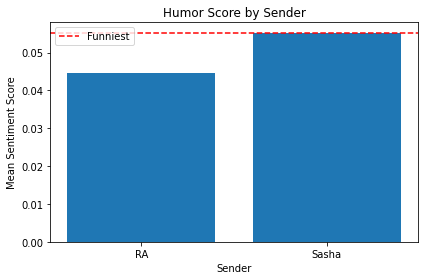

In [82]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Sender' and 'Message' columns

# Perform sentiment analysis on the messages
df['Sentiment'] = df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate the mean sentiment score for each sender
sender_sentiment = df.groupby('Sender')['Sentiment'].mean()

# Identify the sender with the highest mean sentiment score
funnier_sender = sender_sentiment.idxmax()

# Create a bar chart of the mean sentiment scores
plt.bar(sender_sentiment.index, sender_sentiment.values)

# Set labels and title
plt.xlabel('Sender')
plt.ylabel('Mean Sentiment Score')
plt.title('Humor Score by Sender')

# Highlight the sender with the highest mean sentiment score
plt.axhline(y=sender_sentiment[funnier_sender], color='r', linestyle='--', label='Funniest')

# Display the chart
plt.tight_layout()
plt.legend()
plt.show()


## Who is the Sadder:
To determine who was the sadder person in the conversation, we can analyze the sentiment of the messages and identify the sender with the lowest sentiment scores. Lower sentiment scores generally indicate more negative or sad sentiment in the messages.

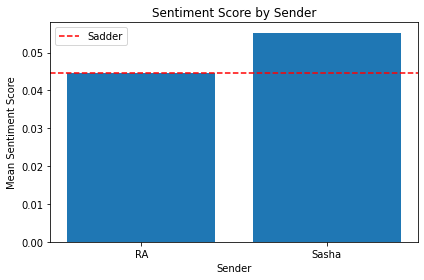

In [83]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Sender' and 'Message' columns

# Perform sentiment analysis on the messages
df['Sentiment'] = df['Message'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate the mean sentiment score for each sender
sender_sentiment = df.groupby('Sender')['Sentiment'].mean()

# Identify the sender with the lowest mean sentiment score
sadder_sender = sender_sentiment.idxmin()

# Create a bar chart of the mean sentiment scores
plt.bar(sender_sentiment.index, sender_sentiment.values)

# Set labels and title
plt.xlabel('Sender')
plt.ylabel('Mean Sentiment Score')
plt.title('Sentiment Score by Sender')

# Highlight the sender with the lowest mean sentiment score
plt.axhline(y=sender_sentiment[sadder_sender], color='r', linestyle='--', label='Sadder')

# Display the chart
plt.tight_layout()
plt.legend()
plt.show()


## The most frequent words per each Sender:

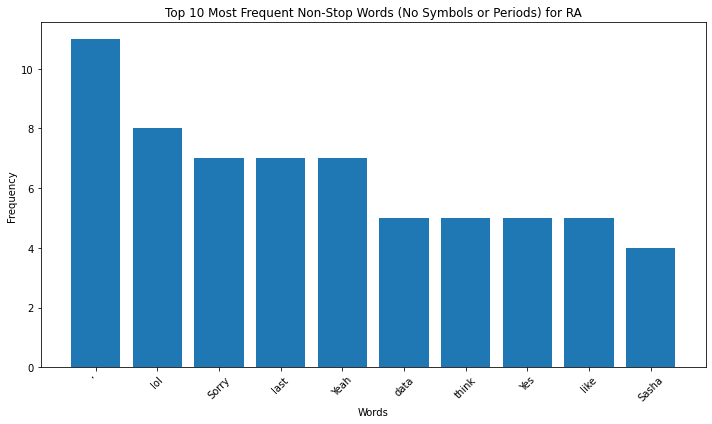

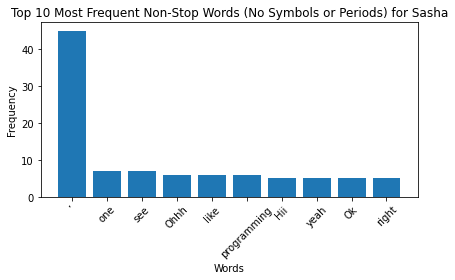

In [90]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Assuming you have a DataFrame named df with 'Sender' and 'Message' columns

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation) - set('.')
additional_chars = {'.'}

def find_most_frequent_words(messages):
    all_text = ' '.join(messages)
    words = word_tokenize(all_text)
    words = [word for word in words if word.lower() not in stop_words and word not in punctuation and word not in additional_chars]
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)  # Retrieve only the top 10 words
    return most_common_words

sender_frequent_words = df.groupby('Sender')['Message'].apply(find_most_frequent_words)

# Set a larger figure size
plt.figure(figsize=(10, 6))

for sender, frequent_words in sender_frequent_words.items():
    words, counts = zip(*frequent_words)
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f"Top 10 Most Frequent Non-Stop Words (No Symbols or Periods) for {sender}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
